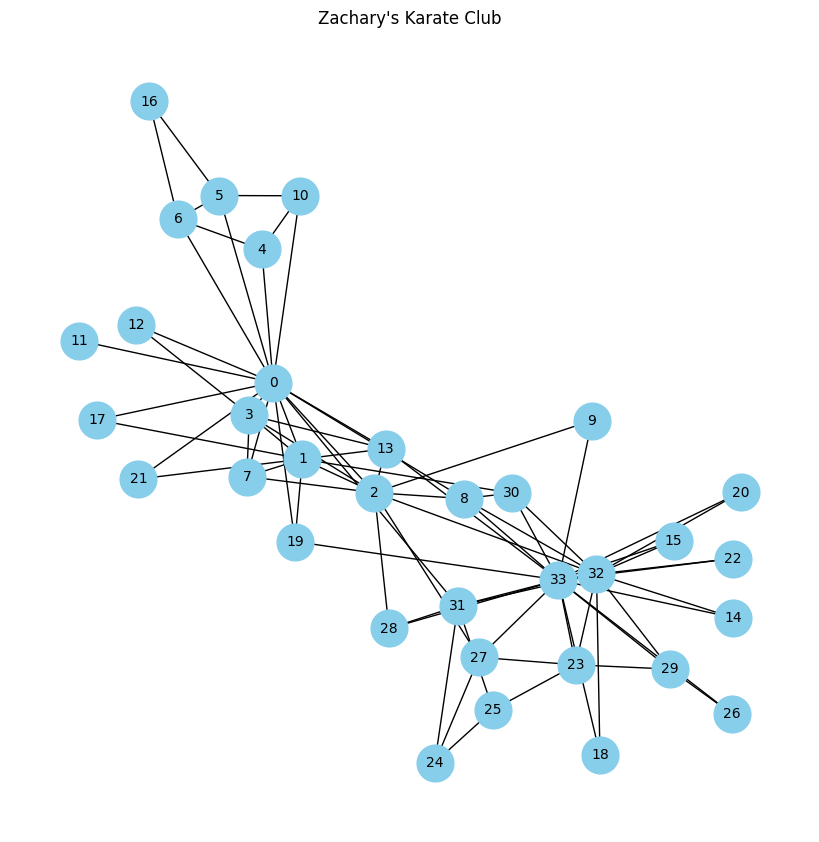

In [27]:
# To get the dataset for Zachary's Karate Club from NetworkX and perform clustering using the specified algorithms, 
# we will use the NetworkX library to load the dataset and then implement clustering algorithms.

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the Zachary Karate Club graph from NetworkX
G = nx.karate_club_graph()

# Visualizing the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", font_size=10)
plt.title("Zachary's Karate Club")
plt.show()

# Now, let's implement clustering algorithms: Grivan-Newman, Ravasz, and Clique



In [28]:
# 1. Grivan-Newman Algorithm (Edge betweenness centrality)
def grivan_newman_clustering(graph):
    components = list(nx.community.girvan_newman(graph))
    return components

# Perform clustering using the Grivan-Newman algorithm
gn_clustering = grivan_newman_clustering(G)
print("Grivan-Newman Clustering Results:")
for i, cluster in enumerate(gn_clustering):
    print(f"Cluster {i+1}: {list(cluster)}")

Grivan-Newman Clustering Results:
Cluster 1: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Cluster 2: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9}]
Cluster 3: [{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9}]
Cluster 4: [{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}]
Cluster 5: [{0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11}]
Cluster 6: [{0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26}]
Cluster 7: [{0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}

In [29]:
def ravasz_clustering(graph):
    # Using NetworkX's modularity optimization function
    communities = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(graph))
    return communities

# Perform clustering using Ravasz algorithm
ravasz_clustering_result = ravasz_clustering(G)
print("\nRavasz Clustering Results:")
for i, cluster in enumerate(ravasz_clustering_result):
    print(f"Cluster {i+1}: {list(cluster)}")


Ravasz Clustering Results:
Cluster 1: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Cluster 2: [1, 2, 3, 7, 9, 12, 13, 17, 21]
Cluster 3: [0, 16, 19, 4, 5, 6, 10, 11]


In [30]:
def clique_clustering(graph, k=3):
    communities = list(nx.algorithms.community.k_clique_communities(graph, k))
    return communities

# Perform clustering using Clique algorithm
clique_clustering_result = clique_clustering(G, k=3)
print("\nClique Clustering Results:")
for i, cluster in enumerate(clique_clustering_result):
    print(f"Cluster {i+1}: {list(cluster)}")


Clique Clustering Results:
Cluster 1: [0, 1, 2, 3, 7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33]
Cluster 2: [0, 4, 5, 6, 10, 16]
Cluster 3: [24, 25, 31]


In [36]:

# Visualize the clusters for each algorithm
def visualize_clusters(graph, clustering_results, algorithm_name):
    plt.figure(figsize=(8, 8))
    colors = plt.cm.get_cmap("tab10", len(clustering_results))

    for i, cluster in enumerate(clustering_results):
        nx.draw(
            graph.subgraph(cluster),
            with_labels=True,
            node_size=700,
            node_color=[colors(i)] * len(cluster),
            font_size=10,
            edge_color=[colors(i)] * len(list(graph.edges(cluster))),
        )

    plt.title(f"{algorithm_name} Clustering")
    plt.show()



C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_8712\617136415.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustering_results))


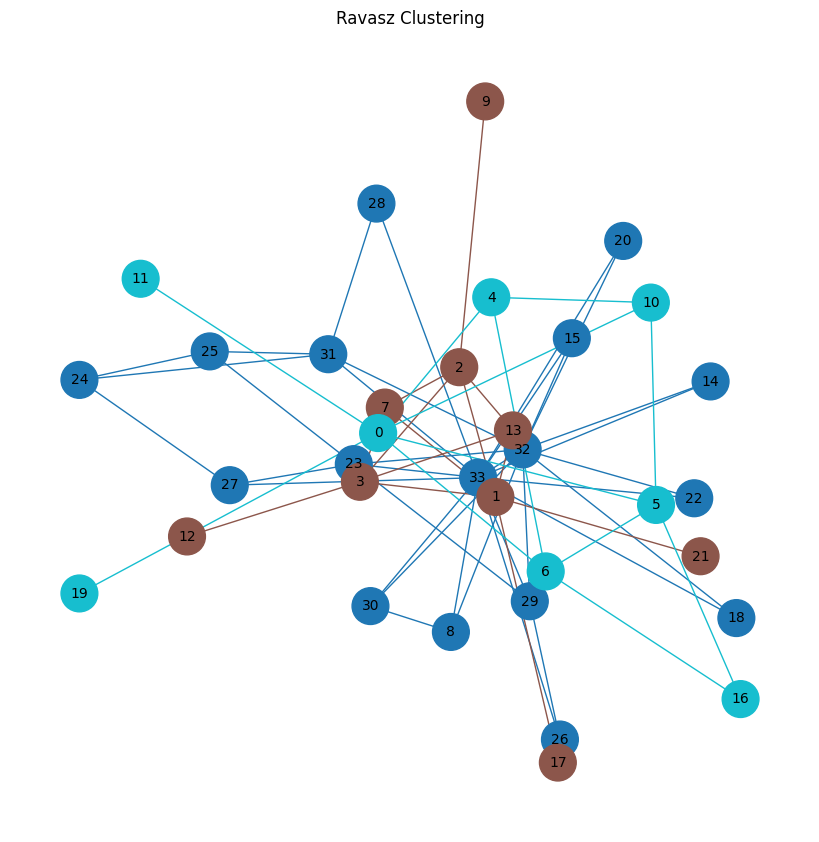

In [37]:
visualize_clusters(G, ravasz_clustering_result, "Ravasz")


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_8712\617136415.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustering_results))


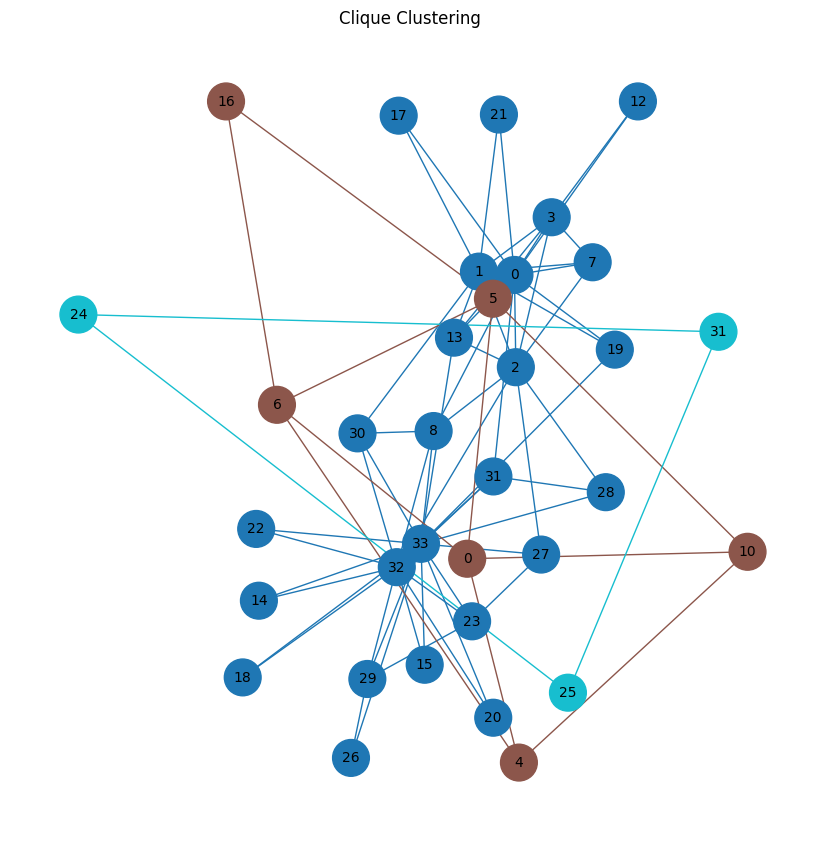

In [38]:
visualize_clusters(G, clique_clustering_result, "Clique")

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_8712\863140231.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(gn_results[level]))


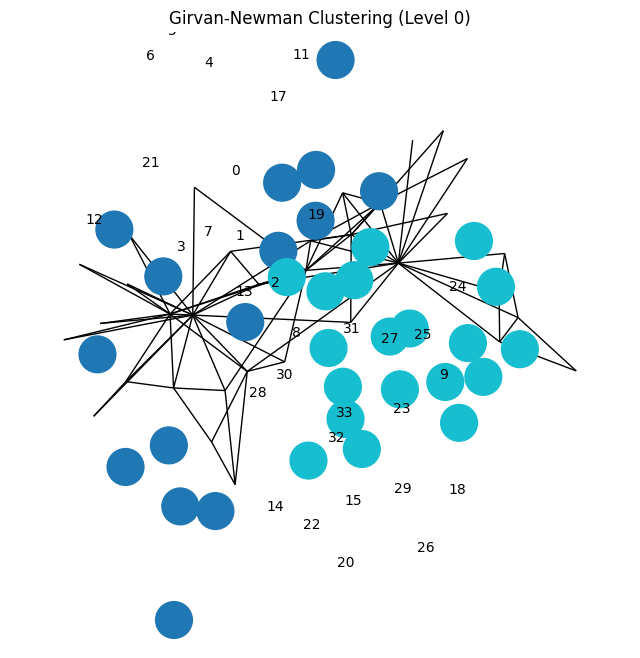

In [34]:
# Visualize the clusters for Girvan-Newman algorithm
def visualize_gn_clusters(graph, gn_results, level=0):
    """Visualize a specific level of the Girvan-Newman hierarchy"""
    if level >= len(gn_results):
        print(f"Warning: Level {level} not available (max level is {len(gn_results)-1})")
        level = len(gn_results) - 1
    
    plt.figure(figsize=(8, 8))
    colors = plt.cm.get_cmap("tab10", len(gn_results[level]))
    
    for i, cluster in enumerate(gn_results[level]):
        nx.draw_networkx_nodes(
            graph,
            pos=nx.spring_layout(graph),
            nodelist=list(cluster),
            node_color=[colors(i)] * len(cluster),
            node_size=700
        )
    
    # Draw all edges
    nx.draw_networkx_edges(graph, pos=nx.spring_layout(graph))
    nx.draw_networkx_labels(graph, pos=nx.spring_layout(graph), font_size=10)
    
    plt.title(f"Girvan-Newman Clustering (Level {level})")
    plt.axis('off')
    plt.show()

# Visualize the first level of Girvan-Newman clustering
visualize_gn_clusters(G, gn_clustering, level=0)